In [77]:
import numpy as np
import pandas as pd

In [78]:
import pandas as pd
import chardet

file_path = 'spam.csv'

# Step 1: Detect the file encoding
with open(file_path, 'rb') as f:
    raw_data = f.read()

result = chardet.detect(raw_data)
encoding = result['encoding']
print(f"Detected encoding: {encoding}")

# Step 2: Read the CSV file with the detected encoding and handle errors
try:
    # Read the CSV file with the detected encoding
    df = pd.read_csv(file_path, encoding=encoding, on_bad_lines='skip')
    print(df.head())
except UnicodeDecodeError as e:
    print(f"UnicodeDecodeError: {e}")
    print("Handling the error by ignoring or replacing problematic characters.")

    # Option 1: Ignore errors
    df = pd.read_csv(file_path, encoding=encoding, errors='ignore', on_bad_lines='skip')

    # Option 2: Replace problematic characters
    # df = pd.read_csv(file_path, encoding=encoding, errors='replace', on_bad_lines='skip')

    print(df.head())



Detected encoding: Windows-1252
     v1                                                 v2 Unnamed: 2   
0   ham  Go until jurong point, crazy.. Available only ...        NaN  \
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN  


In [79]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
3515,ham,"Well, I was about to give up cos they all said...",NaN,NaN,NaN
3552,ham,Din i tell u jus now 420,NaN,NaN,NaN
4135,ham,have you ever had one foot before?,NaN,NaN,NaN
681,ham,ÌÏ log off 4 wat. It's sdryb8i,NaN,NaN,NaN
1728,ham,As per your request 'Maangalyam (Alaipayuthe)'...,NaN,NaN,NaN


In [80]:
df.shape

(5572, 5)

**DATA CLEANING**


In [81]:
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)

In [82]:
df.sample(5)

,v1,v2
235,ham,I have printed it oh. So &lt;#&gt; come upst...
4387,ham,"see you then, we're all christmassy here!"
3475,ham,"I can probably come by, everybody's done aroun..."
4752,spam,Cashbin.co.uk (Get lots of cash this weekend!)...
52,ham,K fyi x has a ride early tomorrow morning but ...


In [83]:
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

,target,text
926,ham,But I'm on a diet. And I ate 1 too many slices...
4122,ham,"Cool, want me to go to kappa or should I meet ..."
2965,ham,"Are you being good, baby? :)"
1655,ham,At 7 we will go ok na.
3713,ham,"Oh, i will get paid. The most outstanding one ..."


In [84]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df['target']=encoder.fit_transform(df['target'])

In [85]:
df.sample(5)

,target,text
4742,0,I am in hospital da. . I will return home in e...
1919,0,Yar i wanted 2 scold u yest but late already.....
452,0,K:)k:)what are detail you want to transfer?acc...
5447,0,So that takes away some money worries
951,0,Shb b ok lor... Thanx...


In [86]:
#MISSING VALUES
df.isnull().sum()

target    0
text      0
dtype: int64

In [87]:
df.duplicated().sum()

403

In [88]:
#DROP DUPLICATES
df=df.drop_duplicates(keep='first')

In [89]:
df.duplicated().sum()

0

In [90]:
df.shape

(5169, 2)

**EDA**

In [91]:
df.head(
)

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [92]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

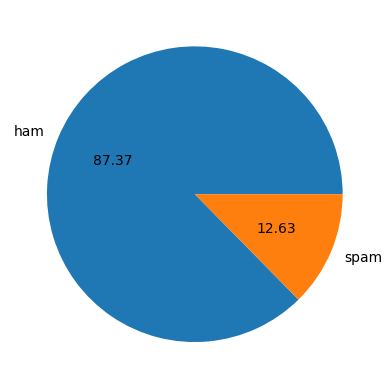

In [93]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [94]:
#data is imbalanced

In [95]:
import nltk

In [96]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\anubh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [97]:
df['num_characters']=df['text'].apply(len)

In [98]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [99]:
#num of words
df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [100]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [101]:
df['num_sentences']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [102]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [103]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [104]:
#ham
df[df['target']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [105]:
#spam
df[df['target']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [106]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

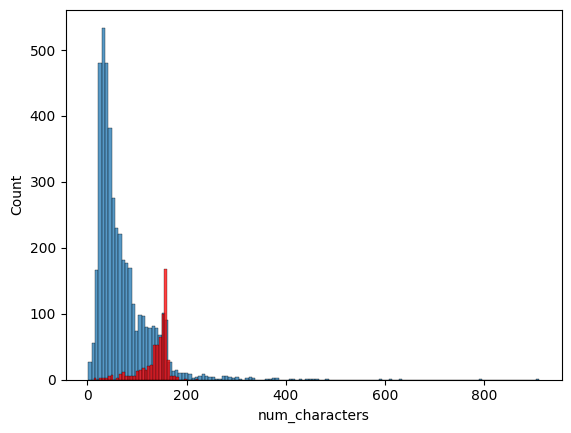

In [107]:
sns.histplot(df[df['target']==0]['num_characters'])#ham
sns.histplot(df[df['target']==1]['num_characters'],color='red')#spam

<Axes: xlabel='num_words', ylabel='Count'>

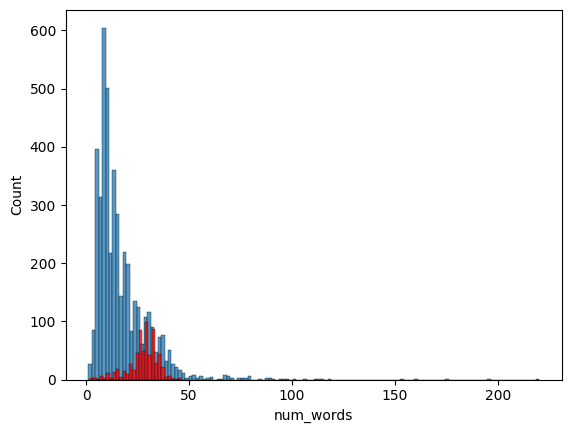

In [108]:
sns.histplot(df[df['target']==0]['num_words'])#ham
sns.histplot(df[df['target']==1]['num_words'],color='red')#spam

<Axes: xlabel='num_sentences', ylabel='Count'>

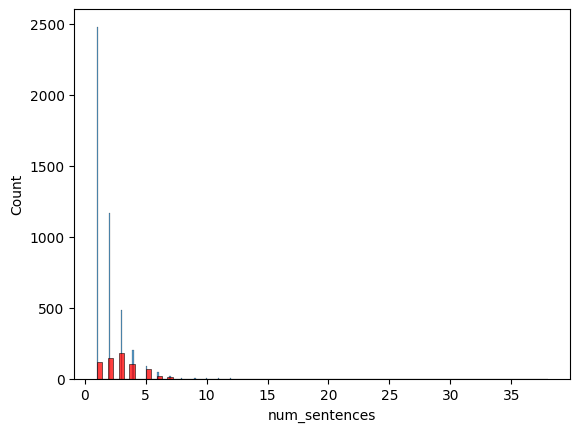

In [109]:
sns.histplot(df[df['target']==0]['num_sentences'])#ham
sns.histplot(df[df['target']==1]['num_sentences'],color='red')#spam

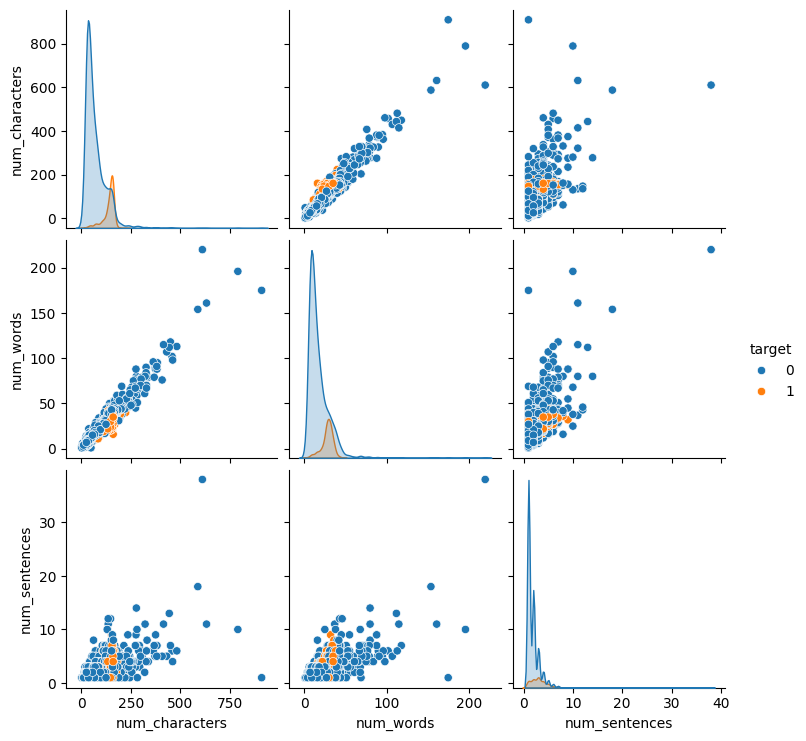

In [110]:
sns.pairplot(df,hue='target')

In [111]:
# sns.heatmap(df.corr(),annot=True)
# df.corr()

**Data Preprocessing**
* Lower case
* Tokenization
* Removing Special Characters
* Removing Stop Words amd punctuation
* Stemming

In [112]:
import string 
# string.punctuation
from nltk.corpus import stopwords
# stopwords.words('english')
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
# ps.stem('loving')
def transform_text(text):
    text=text.lower()
    text = nltk.word_tokenize(text)
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    text = y[:]  #u cant copy lis like this text=y list is a mutable data type  
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()
    for i in text :
        z=ps.stem(i)
        y.append(z) #or y.append(stem(i))

    return "  ".join(y) #or y


In [113]:
# transform_text('HI HELlo how are you %% ? anubhav')
# transform_text('this is a Machine Learning Project ?@ stemming numbing stunning helpful')
transform_text('Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...')

'go  jurong  point  crazi  avail  bugi  n  great  world  la  e  buffet  cine  got  amor  wat'

In [114]:
df['text'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [115]:
df['transformed_text']=df['text'].apply(transform_text)

In [116]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n grea...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup fina...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [117]:
# wordcloud
from wordcloud import WordCloud
wc= WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [118]:
spam_wc=wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))

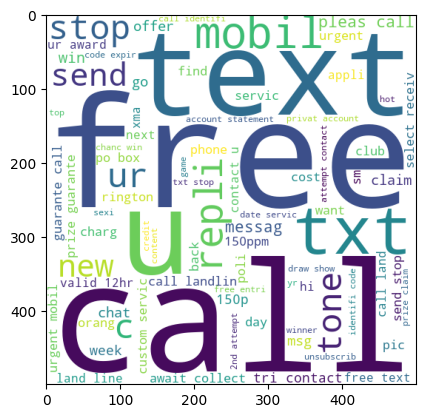

In [119]:
plt.imshow(spam_wc)

In [120]:
ham_wc=wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))

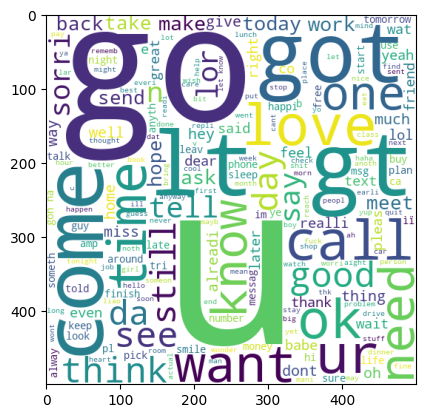

In [121]:
plt.imshow(ham_wc)

In [122]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n grea...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup fina...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [123]:
spam_corpus = []
for msg in df[df['target']==1]['transformed_text'].tolist():
    for words in msg.split():
       spam_corpus.append(words)


In [124]:
len(spam_corpus)

9939

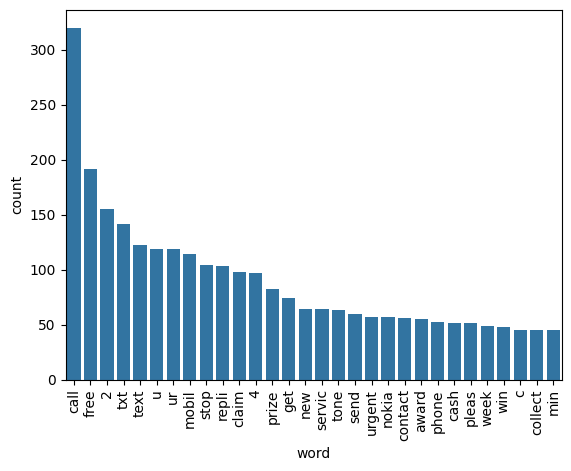

In [125]:
from collections import Counter
zf=pd.DataFrame(Counter(spam_corpus).most_common(30),columns=['word','count'])
zf
sns.barplot(x='word',y='count',data=zf)
plt.xticks(rotation='vertical')
plt.show()

In [126]:
ham_corpus = []
for msg in df[df['target']==0]['transformed_text'].tolist():
    for words in msg.split():
       ham_corpus.append(words)


In [127]:
len(ham_corpus)

35404

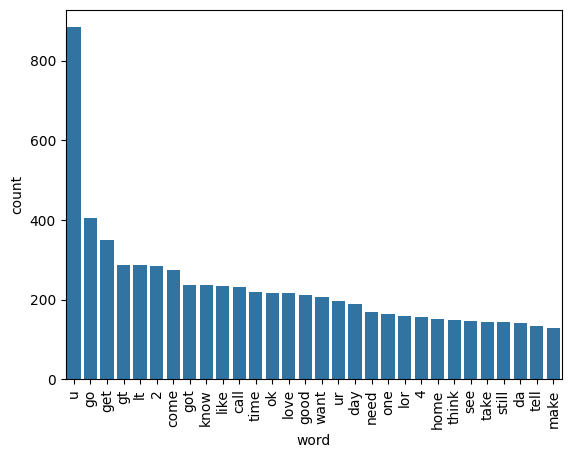

In [128]:
from collections import Counter
cf=pd.DataFrame(Counter(ham_corpus).most_common(30),columns=['word','count'])
cf
sns.barplot(x='word',y='count',data=cf)
plt.xticks(rotation='vertical')
plt.show()

In [129]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n grea...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup fina...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


**Model Building**

In [235]:
#for textual data the best performance is given by 'naive bayes'
# for naive bayes numerical input needed 
# so we will convert text coloumn by doing text vectorization using bag of words
from sklearn.feature_extraction.text import CountVectorizer#used for bag of words
cv = CountVectorizer()
# we can also use Tfidf 
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer(max_features=3000)
# tfidf=TfidfVectorizer()

In [236]:
# X=cv.fit_transform(df['transformed_text']).toarray()
X=tfidf.fit_transform(df['transformed_text']).toarray()

In [237]:
# from sklearn.preprocessing import MinMaxScaler
# scaler=MinMaxScaler()
# X=scaler.fit_transform(X)
X.shape

(5169, 3000)

In [238]:
y=df['target'].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [239]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [240]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()


*1st Algo*

In [241]:
gnb.fit(X_train,y_train)
y_pred1=gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


*2nd Algo*

In [242]:
mnb.fit(X_train,y_train)
y_pred1=mnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1)) 
# we go with this after seeing in both countvectorizer and tfidf
# precision maters more in this

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


*3rd Algo*

In [193]:
bnb.fit(X_train,y_train)
y_pred1=bnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [139]:
# tfidf with mnb selected

**More Models and ALGO Test**

In [194]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,BaggingClassifier,ExtraTreesClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier

In [195]:
svc= SVC(kernel='sigmoid',gamma=1.0)
knc=KNeighborsClassifier()
mnb=MultinomialNB()
dtc=DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc=RandomForestClassifier(n_estimators=50,random_state=2)
abc=AdaBoostClassifier(n_estimators=50,random_state=2)
bc=BaggingClassifier(n_estimators=50,random_state=2)
etc=ExtraTreesClassifier(n_estimators=50,random_state=2)
gc=GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb=XGBClassifier(n_estimators=50,random_state=2)

In [196]:
clfs={
    'SVC':svc,
    'KN': knc,
    'NB':mnb,
    'DT': dtc,
    'LR': lrc,
    'RF':rfc,
    'AdaBoost': abc,
    'BGC':bc,
    'ETC':etc,
    'GBDT':gc,
    'XGB':xgb
}

In [197]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_test)
    accuracy=accuracy_score(y_test,y_pred)
    precison=precision_score(y_test,y_pred)

    return accuracy,precison

In [144]:
# train_classifier(svc,X_train,y_train,X_test,y_test)

In [198]:
accuracy_scores=[]
precision_scores=[]
for name,clf in clfs.items():
    current_accuracy,current_precision=train_classifier(clf,X_train,y_train,X_test,y_test)

    print("For",name)
    print("Accuracy-",current_accuracy)
    print("Precision-",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For SVC
Accuracy- 0.9690522243713733
Precision- 0.9274193548387096
For KN
Accuracy- 0.9052224371373307
Precision- 0.9761904761904762
For NB
Accuracy- 0.9787234042553191
Precision- 0.9461538461538461
For DT
Accuracy- 0.9294003868471954
Precision- 0.8282828282828283
For LR
Accuracy- 0.9671179883945842
Precision- 0.9642857142857143
For RF
Accuracy- 0.9758220502901354
Precision- 0.9829059829059829
For AdaBoost
Accuracy- 0.960348162475822
Precision- 0.9292035398230089
For BGC
Accuracy- 0.9584139264990329
Precision- 0.8682170542635659
For ETC
Accuracy- 0.9748549323017408
Precision- 0.9745762711864406
For GBDT
Accuracy- 0.9468085106382979
Precision- 0.9191919191919192
For XGB
Accuracy- 0.9671179883945842
Precision- 0.9262295081967213


In [155]:
performance_df=pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision', ascending=False)

In [156]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.900387,1.000000
2,NB,0.959381,1.000000
5,RF,0.971954,1.000000
8,ETC,0.972921,0.982456
0,SVC,0.972921,0.974138
6,AdaBoost,0.961315,0.945455
10,XGB,0.972921,0.943548
4,LR,0.951644,0.940000
9,GBDT,0.952611,0.923810
7,BGC,0.958414,0.862595


In [165]:
performance_df1=pd.melt(performance_df,id_vars="Algorithm")
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.900387
1,NB,Accuracy,0.959381
2,RF,Accuracy,0.971954
3,ETC,Accuracy,0.972921
4,SVC,Accuracy,0.972921
5,AdaBoost,Accuracy,0.961315
6,XGB,Accuracy,0.972921
7,LR,Accuracy,0.951644
8,GBDT,Accuracy,0.952611
9,BGC,Accuracy,0.958414


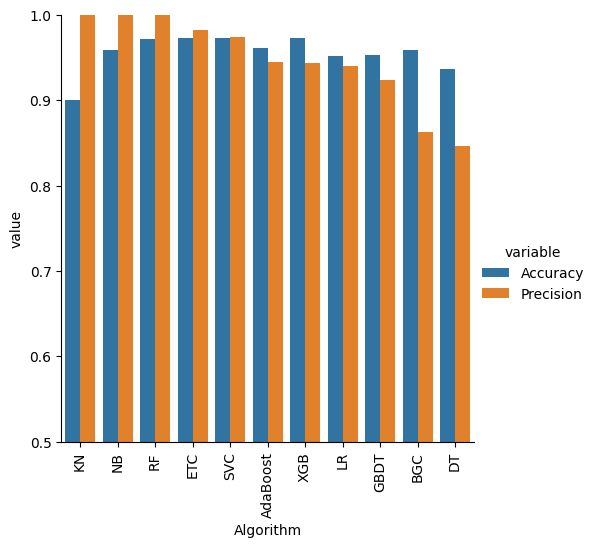

In [168]:
sns.catplot(x='Algorithm',y='value',hue='variable',data=performance_df1,kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

**IMPROVING MODEL**

In [ ]:
#CHANGE THE MAX FEATURES PARAMETER OF TFIDF
# IN TFIDF object add a parameter max_features
# Apply Scaling

In [185]:
temp_df=pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [203]:
merge_df1=performance_df.merge(temp_df,on='Algorithm')
merge_df1

,Algorithm,Accuracy,Precision,Accuracy_max_ft_3000,Precision_max_ft_3000
0,KN,0.900387,1.000000,0.905222,1.000000
1,NB,0.959381,1.000000,0.970986,1.000000
2,RF,0.971954,1.000000,0.975822,0.982906
3,ETC,0.972921,0.982456,0.974855,0.974576
4,SVC,0.972921,0.974138,0.975822,0.974790
5,AdaBoost,0.961315,0.945455,0.960348,0.929204
6,XGB,0.972921,0.943548,0.967118,0.926230
7,LR,0.951644,0.940000,0.958414,0.970297
8,GBDT,0.952611,0.923810,0.946809,0.919192
9,BGC,0.958414,0.862595,0.958414,0.868217


In [200]:
new_df=pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_Scaling':accuracy_scores,'Precision_Scaling':precision_scores}).sort_values('Precision_Scaling',ascending=False)

In [205]:
merge_df1.merge(new_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_max_ft_3000,Precision_max_ft_3000,Accuracy_Scaling,Precision_Scaling
0,KN,0.900387,1.000000,0.905222,1.000000,0.905222,0.976190
1,NB,0.959381,1.000000,0.970986,1.000000,0.978723,0.946154
2,RF,0.971954,1.000000,0.975822,0.982906,0.975822,0.982906
3,ETC,0.972921,0.982456,0.974855,0.974576,0.974855,0.974576
4,SVC,0.972921,0.974138,0.975822,0.974790,0.969052,0.927419
5,AdaBoost,0.961315,0.945455,0.960348,0.929204,0.960348,0.929204
6,XGB,0.972921,0.943548,0.967118,0.926230,0.967118,0.926230
7,LR,0.951644,0.940000,0.958414,0.970297,0.967118,0.964286
8,GBDT,0.952611,0.923810,0.946809,0.919192,0.946809,0.919192
9,BGC,0.958414,0.862595,0.958414,0.868217,0.958414,0.868217


In [210]:
# Voting Classifier best performing models -combination
# Voting classifier is generally a combination of algos which sometimes perform better than your best algo
svc= SVC(kernel='sigmoid',gamma=1.0,probability=True)
mnb=MultinomialNB()
rfc=RandomForestClassifier(n_estimators=50,random_state=2)
etc=ExtraTreesClassifier(n_estimators=50,random_state=2)

from sklearn.ensemble import VotingClassifier

In [211]:
voting = VotingClassifier(estimators=[('svm',svc),('nb',mnb),('et',etc),('rf',rfc)],voting='soft')

In [212]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2)),
                             ('rf',
                              RandomForestClassifier(n_estimators=50,
                                                     random_state=2))],
                 voting='soft')

In [213]:
y_pred=voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9806576402321083
Precision 0.9682539682539683


**Stacking (also known as stacked generalization) is an ensemble learning technique that combines multiple classification or regression models to improve the overall performance. The idea is to train a meta-model (or meta-learner) to make final predictions based on the outputs of several base models.**
- Train Base Models: Train multiple different base models on the training dataset.
- Generate Predictions: Use these base models to make predictions on the same training dataset.
- Train Meta-Model: Use the predictions of the base models as input features to train a meta-model. This meta-model learns to correct the errors of the base models.
- Make Final Predictions: Use the trained meta-model to make final predictions on new, unseen data by first obtaining the predictions from the base models and then using these predictions as input for the meta-model.

In [226]:
# Applying Stacking 
# Similar to voting in this weightage is given to algorithms but in voting equal weightage given  
estimators=[('svm',svc),('nb',mnb),('et',etc),('rf',rfc)]
final_estimator=LogisticRegression()

In [227]:
from sklearn.ensemble import StackingClassifier
clf= StackingClassifier(estimators=estimators,final_estimator=final_estimator)

In [228]:
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9835589941972921
Precision 0.9689922480620154


In [ ]:
# we will use mnb 
# and create a pipeline now and change it into website 

In [ ]:
# 3steps for pipeline the new email 
# 1st text preprocessing
# 2nd we will vectorize it 
# Vectorizing is converting the text data into numerical format for the ml models to work on it or taken as an input 
# 3rd apply algorithm

In [ ]:
# Using pickle to save your vectorizer and model objects is 
# a common and effective way to persist them for later use. 
# This allows you to load them back into memory and use them 
# without having to retrain the model or refit the vectorizer.

In [ ]:
# Pickle is a module in Python used for serializing and deserializing objects. 
# Serialization refers to the process of converting an object into 
# a byte stream, which can then be stored 
# in a file, sent over a network, or stored in a database. 
# Deserialization is the reverse process, where the
#  byte stream is converted back into a Python object.

In [243]:
import pickle 
pickle.dump(tfidf,open('vectorizer.pkl','wb')) 
pickle.dump(mnb,open('model.pkl','wb'))